In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Read the German text file
with open("german.txt", "r") as file:
    german_words = file.read().splitlines()

In [3]:
# Read the English text file
with open("english.txt", "r") as file:
    english_words = file.read().splitlines()

In [4]:
# Read the Spanish text file
with open("Spanish.txt", "r") as file:
    spanish_words = file.read().splitlines()

In [5]:
english_words = [word.lower() for word in english_words if len(word) == 5]
german_words = [word.lower() for word in german_words if len(word) == 5]
spanish_words = [word.lower() for word in spanish_words if len(word) == 5]

In [6]:
german_tens = [torch.tensor([ord(char) for char in word]) for word in german_words]
english_tens = [torch.tensor([ord(char) for char in word]) for word in english_words]
spanish_tens = [torch.tensor([ord(char) for char in word]) for word in spanish_words]

In [7]:
from sklearn.model_selection import train_test_split
all_data = german_tens + english_tens + spanish_tens
all_data = torch.stack(all_data)
all_labels = [0] * len(german_words) + [1] * len(english_words) + [2] * len(spanish_words)
# Split into training and testing datasets
train_data, test_data, train_labels, test_labels = train_test_split(
    all_data, all_labels, test_size=0.2, random_state=42)


In [8]:
# convert training and testing data into tensors
train_data = torch.tensor(train_data)
test_data = torch.tensor(test_data)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

/var/folders/3y/0v123l8d2sb9w0m65hyv455w0000gq/T/ipykernel_28561/2325517820.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data)
/var/folders/3y/0v123l8d2sb9w0m65hyv455w0000gq/T/ipykernel_28561/2325517820.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = torch.tensor(test_data)


In [9]:
# create two datasets for the loaders
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

In [10]:
# Define the MLP model class:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Tanh()
    
    def forward(self, x):
        x = self.activation(self.fc1(x).float())
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
# set hyperparameters
input_size = len(train_data[0])
hidden_size = 20
output_size = 3
epochs = 50
learning_rate = 0.001
batch_size = 30

In [12]:
# instantiate the model
model = MLP(input_size, hidden_size, output_size)

In [13]:
# define the loss function and optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [14]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
# train the model
loss_vals = []
accuracy_vals = []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_vals.append(loss.item())

    model.eval()
    with torch.no_grad():
        predicts = model(test_data.float())
        predicts = torch.argmax(predicts, dim=1)
        correct = (predicts == test_labels).sum().item()
        accuracy = correct / len(test_labels)
        accuracy_vals.append(accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")


Epoch [1/50], Loss: 0.9083, Test Accuracy: 0.5952
Epoch [2/50], Loss: 0.7643, Test Accuracy: 0.6022
Epoch [3/50], Loss: 1.3808, Test Accuracy: 0.6017
Epoch [4/50], Loss: 1.5014, Test Accuracy: 0.6024
Epoch [5/50], Loss: 0.9480, Test Accuracy: 0.6024
Epoch [6/50], Loss: 1.0683, Test Accuracy: 0.6024
Epoch [7/50], Loss: 0.9348, Test Accuracy: 0.6024
Epoch [8/50], Loss: 0.8874, Test Accuracy: 0.6024
Epoch [9/50], Loss: 1.3585, Test Accuracy: 0.6024
Epoch [10/50], Loss: 1.1869, Test Accuracy: 0.6283
Epoch [11/50], Loss: 0.5355, Test Accuracy: 0.6273
Epoch [12/50], Loss: 0.7570, Test Accuracy: 0.6283
Epoch [13/50], Loss: 0.4942, Test Accuracy: 0.6285
Epoch [14/50], Loss: 0.4959, Test Accuracy: 0.6285
Epoch [15/50], Loss: 1.0661, Test Accuracy: 0.6245
Epoch [16/50], Loss: 1.1437, Test Accuracy: 0.6285
Epoch [17/50], Loss: 0.9861, Test Accuracy: 0.6285
Epoch [18/50], Loss: 0.9632, Test Accuracy: 0.6285
Epoch [19/50], Loss: 0.7402, Test Accuracy: 0.6285
Epoch [20/50], Loss: 1.0590, Test Accura

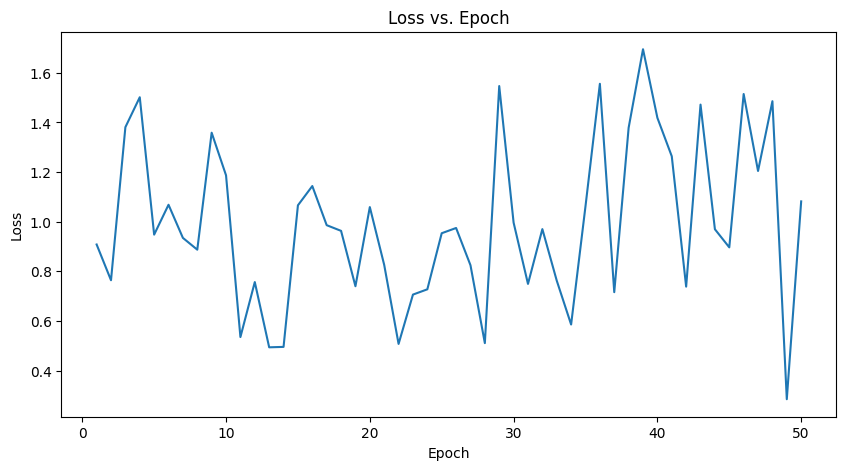

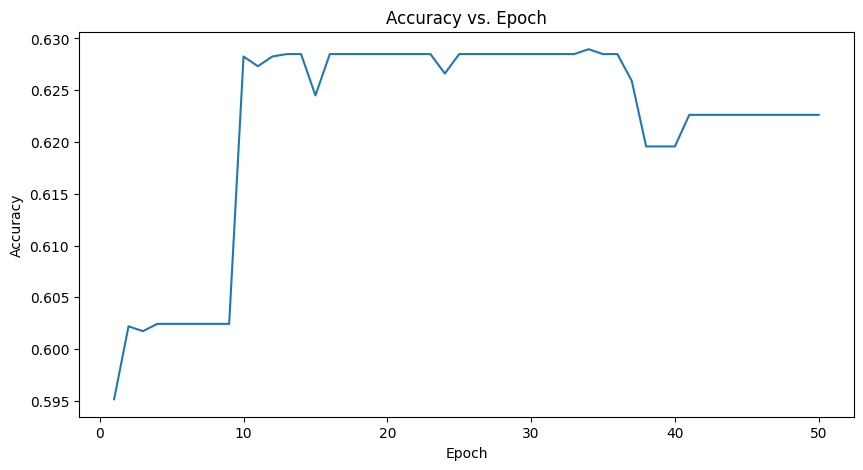

In [16]:
# Plot loss vs. epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), loss_vals)
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot accuracy vs. epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), accuracy_vals)
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()